In [3]:
import os.path
import numpy as np
import matplotlib.pyplot as plt
import scipy
import refnx #https://refnx.readthedocs.io/en/latest/installation.html
from refnx.dataset import ReflectDataset, Data1D
from refnx.analysis import Transform, CurveFitter, Objective, Model, Parameter
from refnx.reflect import SLD, Slab, ReflectModel
import time
import mpld3 #you may need to pip install mpld3 to get this working - it allows zoom action on inline plots
import seaborn as sns
pth = r'/Users/sph/Library/CloudStorage/GoogleDrive-circuitqed@gmail.com/My Drive/Projects/Materials/XRay/XRR/'
path = os.getcwd()
%load_ext autoreload
%autoreload 2

%matplotlib widget
import glob 
import ana_xrr


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


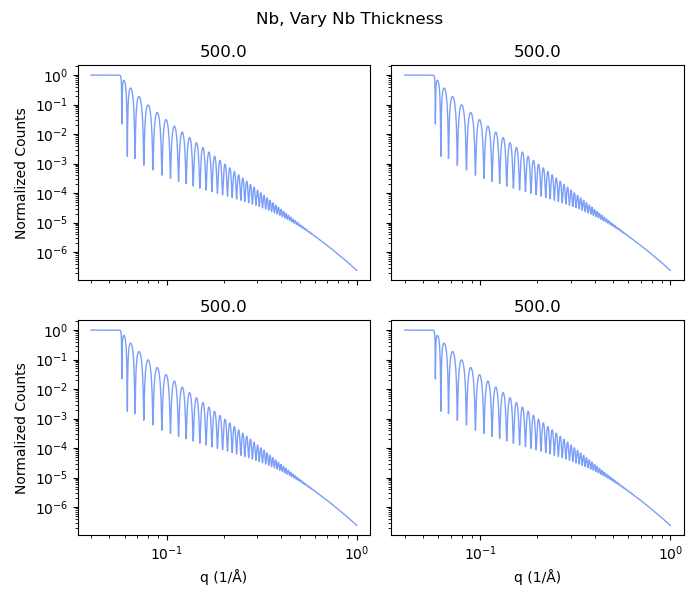

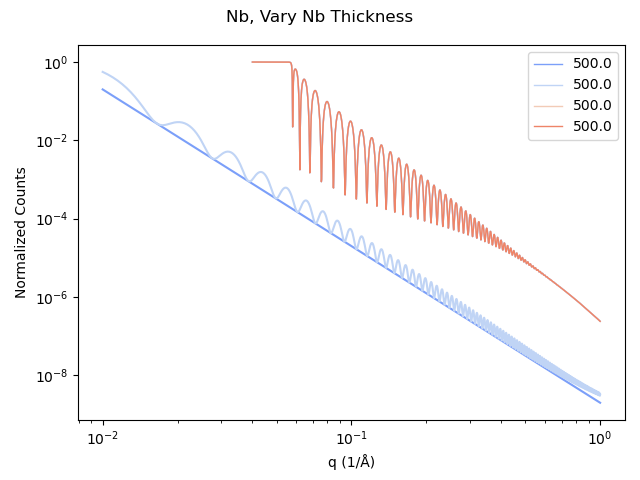

In [222]:
ana_xrr.plot_vary('nb_thk', np.linspace(500,500,4), 'Nb, Vary Nb Thickness', level='nb')
qval = np.linspace(0.01,1,2000)
def four_func(x, a, b): return a*x**-b 
#plt.plot(qval, four_func(qval, 1e-8, 4))
phi = np.pi/2
thk=570/2
def sin_func(x, f, phi, a, gamma,off): return a*(np.sin(f*x+phi)**2*np.exp(-gamma*x)+off)
plt.plot(qval, four_func(qval, 2e-9, 4))
#plt.plot(qval, four_func(qval, 1e-8, 3.5)*0.5*(np.sin(200*qval*np.pi+phi)+1))
#plt.plot(qval, four_func(qval, 5e-6, 2)*sin_func(qval, thk, phi, 0.3, 20,1.3)+1e-9)
plt.loglog(qval, four_func(qval, 2e-9, 4)*sin_func(qval, thk, phi, 2, 2,0.5)+1e-9)

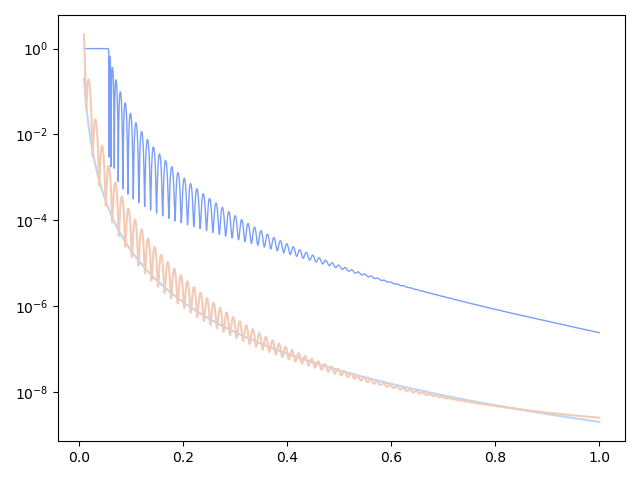

In [223]:
ana_xrr.plot_model(cfg={'nb_thk':500})
qval = np.linspace(0.01,1,2000)
def four_func(x, a, b): return a*x**-b 
#plt.plot(qval, four_func(qval, 1e-8, 4))
phi = np.pi/2+1.2
thk=500/2
amp=30
decay = 8
def sin_func(x, f, phi, a, gamma,off): return a*(np.sin(f*x+phi)**2*np.exp(-gamma*x)+off)
plt.plot(qval, four_func(qval, 2e-9, 4))
plt.semilogy(qval, four_func(qval, 1e-9, 4)*sin_func(qval, thk, phi, amp, decay,0.05)+1e-9)

### Plot bilayers to check beating 

(<Figure size 640x480 with 1 Axes>, <Axes: >)

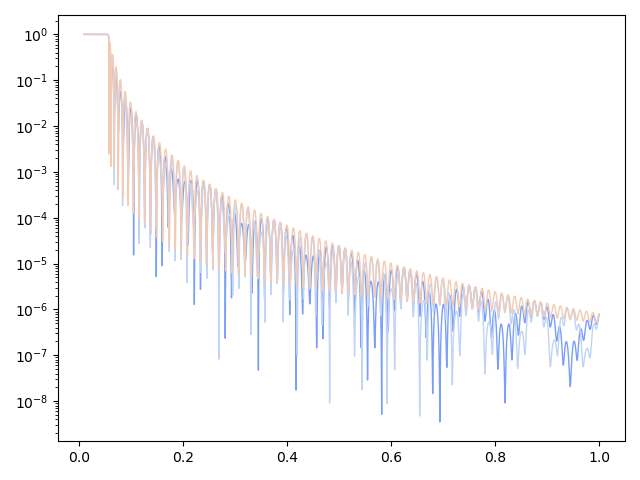

In [224]:
fig, ax = ana_xrr.plot_model(level='al/nb', cfg={'nb_thk':500,'al_thk':50,'nb_rough':0,'al_rough':0,'substrate_rough':2})
ana_xrr.plot_model(level='al/nb', cfg={'nb_thk':500,'al_thk':100,'nb_rough':0,'al_rough':0,'substrate_rough':2},ax=ax, fig=fig)
ana_xrr.plot_model(level='nb', cfg={'nb_thk':500,'al_thk':50,'nb_rough':0,'substrate_rough':2},ax=ax, fig=fig)


# Period is 10 


### Compare different oxide locations

(<Figure size 640x480 with 1 Axes>, <Axes: >)

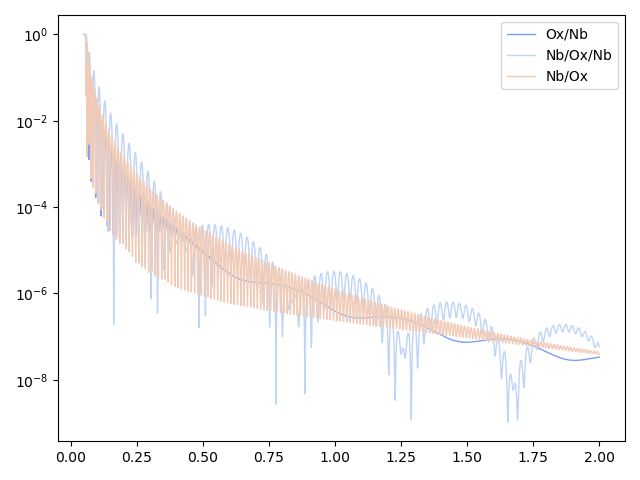

In [255]:
rg = 5

#ana_xrr.plot_model(level='nb/ox/nb', cfg={'nb_thk':300,'nb2_thk':200,'nb_rough':0,'al_rough':0, 'top_oxide_rough':0, 'substrate_rough':rg},ax=ax, fig=fig)
#
fig, ax = ana_xrr.plot_model(level='ox/nb', cfg={'nb_thk':500,'nb2_thk':250,'nb_rough':0,'al_rough':0, 'top_oxide_rough':0, 'substrate_rough':rg}, name='Ox/Nb', q=np.linspace(0.05, 2,5000))
#fig, ax = ana_xrr.plot_model(level='nb', cfg={'nb_thk':500,'al_thk':200,'nb_rough':0,'al_rough':0,'substrate_rough':rg}, ax=ax, fig=fig, name='Nb/Ox', q=np.linspace(0.05, 2,5000))
fig, ax = ana_xrr.plot_model(level='nb/ox/nb', cfg={'nb_thk':250,'nb2_thk':250,'nb_rough':0,'al_rough':0, 'top_oxide_rough':0, 'substrate_rough':rg},ax=ax, fig=fig, q=np.linspace(0.05, 2,5000), name='Nb/Ox/Nb')
ana_xrr.plot_model(level='nb/ox', cfg={'nb_thk':500,'nb_rough':0,'al_rough':0, 'bottom_oxide_rough':rg/4,'bottom_oxide_thk':15, 'substrate_rough':rg},ax=ax, fig=fig, name='Nb/Ox', q=np.linspace(0.05, 2,5000))

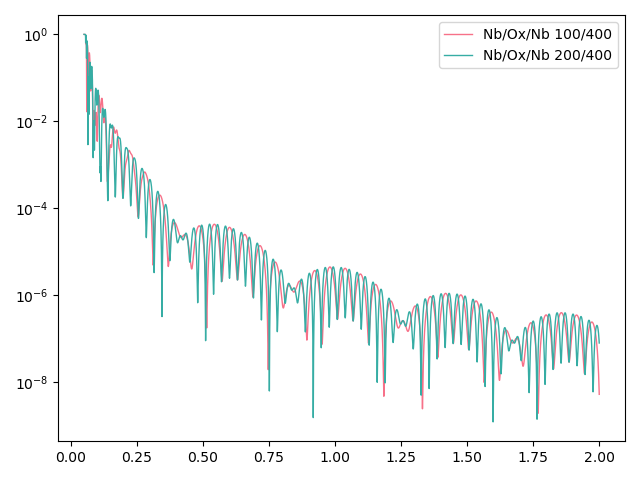

In [326]:
rg=10
rg_nb_top = 0
rg_nb_bot = 0
top_oxide_rough =0 
sns.set_palette('husl',2)
# At high substrate roughness, the fine pattern disappears, we only get the top layer of Nb 
# High roughness of top nb and substrate, just see the oxide really quickly 
# At high roughness of top Nb, not substrate, we see the bottom layer of Nb only 
#At high roughness of bottom Nb, stop seeing oxide, see messiness
# Top oxide rough also affects seeing the oxide 
# High roughness of both 
#fig, ax = ana_xrr.plot_model(level='nb/ox/nb', cfg={'nb_thk':250,'nb2_thk':250,'nb_rough':0,'al_rough':0, 'top_oxide_rough':0, 'substrate_rough':rg},q=np.linspace(0.05, 2,5000), name='Nb/Ox/Nb 250/250')


#fig, ax = ana_xrr.plot_model(level='nb/ox/nb', cfg={'nb_thk':400,'nb2_thk':100,'nb_rough':rg_nb_bot,'al_rough':0, 'top_oxide_rough':top_oxide_rough, 'substrate_rough':rg,'nb2_rough':rg_nb_top}, q=np.linspace(0.05, 2,10000), name='Nb/Ox/Nb 100/400')
#fig, ax = ana_xrr.plot_model(level='nb/ox/nb', cfg={'nb_thk':100,'nb2_thk':400,'nb_rough':rg_nb_bot,'al_rough':0, 'top_oxide_rough':top_oxide_rough, 'substrate_rough':rg,'nb2_rough':rg_nb_top},ax=ax, fig=fig, q=np.linspace(0.05, 2,10000), name='Nb/Ox/Nb 400/100')
#1.008 1.02 1.023
# 418 523
np.pi*2 / (1.0384-1.008) # 206, 300/200
#np.pi*2 / (1.023-1.008)
#np.pi*2 / (1.032-1.008) # 261 250/250 
#np.pi*2/(1.0685-1.0095) # 106 400/100 


fig, ax = ana_xrr.plot_model(level='nb/ox/nb', cfg={'nb_thk':400,'nb2_thk':100,'nb_rough':rg_nb_bot,'al_rough':0, 'top_oxide_rough':top_oxide_rough, 'substrate_rough':rg,'nb2_rough':rg_nb_top}, q=np.linspace(0.05, 2,10000), name='Nb/Ox/Nb 100/400')
fig, ax = ana_xrr.plot_model(level='nb/ox/nb', cfg={'nb_thk':400,'nb2_thk':200,'nb_rough':rg_nb_bot,'al_rough':0, 'top_oxide_rough':top_oxide_rough, 'substrate_rough':rg,'nb2_rough':rg_nb_top},ax=ax, fig=fig, q=np.linspace(0.05, 2,10000), name='Nb/Ox/Nb 200/400')

# nb2 is the top layer 

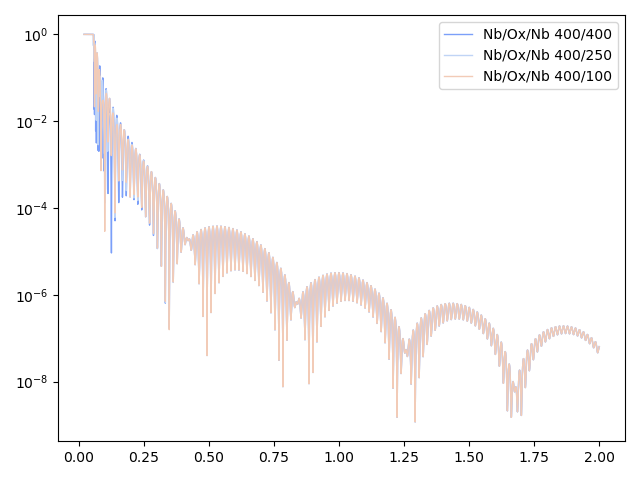

In [293]:
rg=10
fig, ax = ana_xrr.plot_model(level='nb/ox/nb', cfg={'nb_thk':400,'nb2_thk':400,'nb_rough':0,'al_rough':0, 'top_oxide_rough':0, 'substrate_rough':rg}, q=np.linspace(0.02, 2,5000), name='Nb/Ox/Nb 400/400')
fig, ax = ana_xrr.plot_model(level='nb/ox/nb', cfg={'nb_thk':250,'nb2_thk':400,'nb_rough':0,'al_rough':0, 'top_oxide_rough':0, 'substrate_rough':rg}, ax=ax, fig=fig, q=np.linspace(0.02, 2,5000), name='Nb/Ox/Nb 400/250')
fig, ax = ana_xrr.plot_model(level='nb/ox/nb', cfg={'nb_thk':100,'nb2_thk':400,'nb_rough':0,'al_rough':0, 'top_oxide_rough':0, 'substrate_rough':rg},ax=ax, fig=fig, q=np.linspace(0.02, 2,5000), name='Nb/Ox/Nb 400/100')

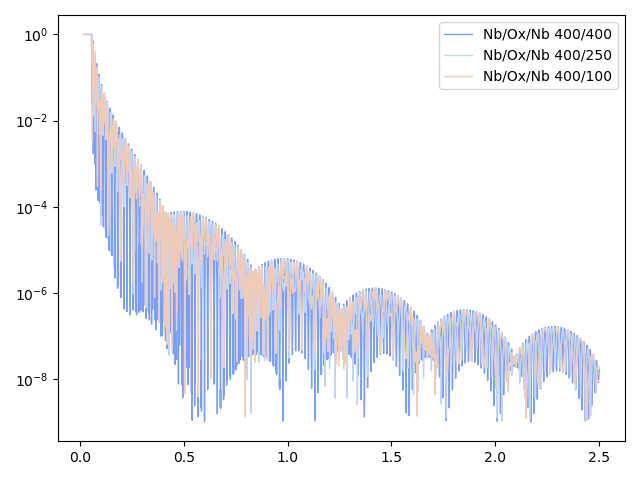

In [286]:
rg=0
fig, ax = ana_xrr.plot_model(level='nb/ox/nb', cfg={'nb_thk':400,'nb2_thk':400,'nb_rough':0,'al_rough':0, 'top_oxide_rough':0, 'substrate_rough':rg}, q=np.linspace(0.02, 2.5,10000), name='Nb/Ox/Nb 400/400')
fig, ax = ana_xrr.plot_model(level='nb/ox/nb', cfg={'nb_thk':250,'nb2_thk':400,'nb_rough':0,'al_rough':0, 'top_oxide_rough':0, 'substrate_rough':rg}, ax=ax, fig=fig, q=np.linspace(0.02, 2.5,10000), name='Nb/Ox/Nb 400/250')
fig, ax = ana_xrr.plot_model(level='nb/ox/nb', cfg={'nb_thk':100,'nb2_thk':400,'nb_rough':0,'al_rough':0, 'top_oxide_rough':0, 'substrate_rough':rg},ax=ax, fig=fig, q=np.linspace(0.02, 2.5,10000), name='Nb/Ox/Nb 400/100')

(0.05, 1)

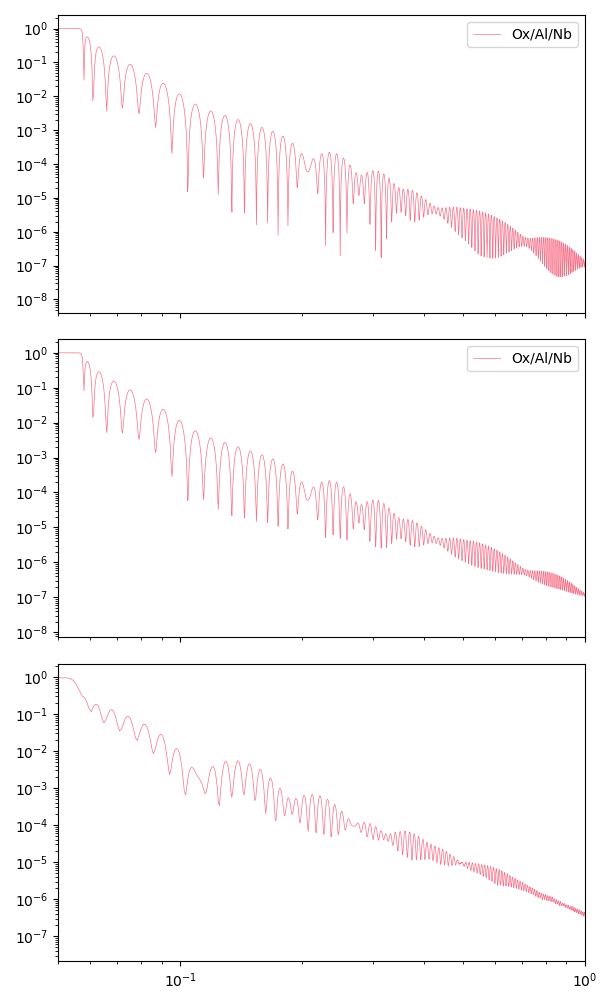

In [586]:
sns.set_palette('husl',3)
rg=0.5
alr =1
nbr = 6
tor = 1
alt = 22
althk = 80
flist = ['lv1_XRR_1_scan1.txt','lv2_XRR_1_scan1.txt','lv3_XRR_1_scan1.txt','lv4_XRR_1_scan1.txt','lv5_XRR_1_scan1.txt','lv6_XRR_1_redo_scan1.txt','lv6_XRR_1_scan1.txt','lv7_XRR_1_scan1.txt','su01_XRR_1_remeas_scan1.txt','su01_XRR_3_scan1.txt','su02_XRR_1_scan1.txt','su03_XRR_1_scan1.txt','su04_XRR_1_scan1.txt','su05_XRR_1_scan1.txt','su06_XRR_1_scan1.txt','su07_XRR_1_scan1.txt','su08_XRR_1_scan1.txt']
data = ana_xrr.loadRefData(os.path.join(pth,flist[13]))
fig, ax = plt.subplots(3,1, sharex=True, figsize=(6,10)) 
#fig, ax = ana_xrr.plot_model(level='al/nb', cfg={'nb_thk':570,'al_thk':30,'nb_rough':3,'al_rough':3, 'top_oxide_rough':0, 'substrate_rough':rg}, q=np.linspace(0.02, 1,5000), name='Al/Nb')
#fig, ax = ana_xrr.plot_model(level='ox/al/nb', cfg={'nb_thk':570,'al_thk':70,'nb_rough':5,'al_rough':0, 'top_oxide_rough':0, 'substrate_rough':rg,'dq':0.5}, q=np.linspace(0.02, 1,5000), name='Ox/Al/Nb')
#fig, ax = ana_xrr.plot_model(level='ox/al/nb', cfg={'nb_thk':570,'al_thk':70,'nb_rough':4,'al_rough':10, 'top_oxide_rough':0, 'top_oxide_thk':35,'substrate_rough':rg}, q=np.linspace(0.02, 1,5000), name='Ox/Al/Nb')
#fig, ax = ana_xrr.plot_model(level='ox/al/nb', cfg={'nb_thk':570,'al_thk':70,'nb_rough':0,'al_rough':0, 'top_oxide_rough':0, 'substrate_rough':rg,'dq':1}, q=np.linspace(0.02, 1,5000), name='Ox/Al/Nb')

#ana_xrr.plot_model(level='ox/al/nb', cfg={'nb_thk':570,'al_thk':80,'nb_rough':5,'al_rough':0, 'top_oxide_rough':0, 'top_oxide_thk':20,'substrate_rough':rg}, fig=fig, ax=ax[0], q=np.linspace(0.02, 1,5000), name='Ox/Al/Nb')
ana_xrr.plot_model(level='ox/al/nb', cfg={'nb_thk':570,'al_thk':althk,'nb_rough':nbr,'al_rough':alr, 'top_oxide_rough':tor, 'top_oxide_thk':alt,'substrate_rough':rg}, fig=fig, ax=ax[0], q=np.linspace(0.02, 1.5,5000), name='Ox/Al/Nb')
#ana_xrr.plot_model(level='ox/al/nb', cfg={'nb_thk':570,'al_thk':80,'nb_rough':5,'al_rough':0, 'top_oxide_rough':0, 'top_oxide_thk':15,'substrate_rough':rg}, fig=fig, ax=ax[1], q=np.linspace(0.02, 1.5,5000), name='Ox/Al/Nb')
# top oxide roughness doesn't seem to help 
#ana_xrr.plot_model(level='ox/al/nb/ox', cfg={'nb_thk':570,'al_thk':80,'nb_rough':5,'al_rough':3, 'top_oxide_rough':0, 'top_oxide_thk':20,'substrate_rough':rg,'bottom_oxide_rough':1,'middle_oxide_thk':0,'bottom_oxide_thk':5}, fig=fig, ax=ax[1], q=np.linspace(0.02, 1,5000), name='Ox/Al/Nb')
ana_xrr.plot_model(level='ox/al/nb', cfg={'nb_thk':570,'al_thk':althk,'nb_rough':nbr,'al_rough':alr, 'top_oxide_rough':tor, 'top_oxide_thk':alt,'substrate_rough':rg,'dq':0.5,
                                                'middle_oxide_rough':20,'bottom_oxide_rough':rg,'middle_oxide_thk':5,'bottom_oxide_thk':5}, fig=fig, ax=ax[1], q=np.linspace(0.02, 1.5,5000), name='Ox/Al/Nb')


ax[2].loglog(data.x, data.y, linewidth=0.5)
ax[2].set_xlim(0.05, 1)
# increasing al rough ness increases the fish 
# top oxide roughness changes how much we can see the narrow fish 
# al rough is giving some of the overal 
#fig, ax = ana_xrr.plot_model(level='nb/ox/nb', cfg={'nb_thk':250,'nb2_thk':400,'nb_rough':0,'al_rough':0, 'top_oxide_rough':0, 'substrate_rough':rg}, ax=ax, fig=fig, q=np.linspace(0.02, 2.5,10000), name='Nb/Ox/Nb 400/250')
#fig, ax = ana_xrr.plot_model(level='nb/ox/nb', cfg={'nb_thk':100,'nb2_thk':400,'nb_rough':0,'al_rough':0, 'top_oxide_rough':0, 'substrate_rough':rg},ax=ax, fig=fig, q=np.linspace(0.02, 2.5,10000), name='Nb/Ox/Nb 400/100')

(1e-08, 1.2)

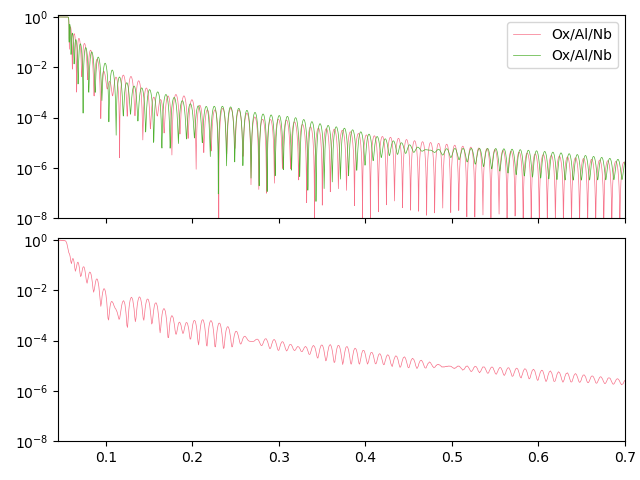

In [574]:
sns.set_palette('husl',3)
rg=0.5
alr =6
nbr = 6
tor = 1
alt = 22
althk = 80
flist = ['lv1_XRR_1_scan1.txt','lv2_XRR_1_scan1.txt','lv3_XRR_1_scan1.txt','lv4_XRR_1_scan1.txt','lv5_XRR_1_scan1.txt','lv6_XRR_1_redo_scan1.txt','lv6_XRR_1_scan1.txt','lv7_XRR_1_scan1.txt','su01_XRR_1_remeas_scan1.txt','su01_XRR_3_scan1.txt','su02_XRR_1_scan1.txt','su03_XRR_1_scan1.txt','su04_XRR_1_scan1.txt','su05_XRR_1_scan1.txt','su06_XRR_1_scan1.txt','su07_XRR_1_scan1.txt','su08_XRR_1_scan1.txt']
data = ana_xrr.loadRefData(os.path.join(pth,flist[13]))
fig, ax = plt.subplots(2,1, sharex=True, sharey=True) 
#fig, ax = ana_xrr.plot_model(level='al/nb', cfg={'nb_thk':570,'al_thk':30,'nb_rough':3,'al_rough':3, 'top_oxide_rough':0, 'substrate_rough':rg}, q=np.linspace(0.02, 1,5000), name='Al/Nb')
#fig, ax = ana_xrr.plot_model(level='ox/al/nb', cfg={'nb_thk':570,'al_thk':70,'nb_rough':5,'al_rough':0, 'top_oxide_rough':0, 'substrate_rough':rg,'dq':0.5}, q=np.linspace(0.02, 1,5000), name='Ox/Al/Nb')
#fig, ax = ana_xrr.plot_model(level='ox/al/nb', cfg={'nb_thk':570,'al_thk':70,'nb_rough':4,'al_rough':10, 'top_oxide_rough':0, 'top_oxide_thk':35,'substrate_rough':rg}, q=np.linspace(0.02, 1,5000), name='Ox/Al/Nb')
#fig, ax = ana_xrr.plot_model(level='ox/al/nb', cfg={'nb_thk':570,'al_thk':70,'nb_rough':0,'al_rough':0, 'top_oxide_rough':0, 'substrate_rough':rg,'dq':1}, q=np.linspace(0.02, 1,5000), name='Ox/Al/Nb')

#ana_xrr.plot_model(level='ox/al/nb', cfg={'nb_thk':570,'al_thk':80,'nb_rough':5,'al_rough':0, 'top_oxide_rough':0, 'top_oxide_thk':20,'substrate_rough':rg}, fig=fig, ax=ax[0], q=np.linspace(0.02, 1,5000), name='Ox/Al/Nb')
ana_xrr.plot_model(level='ox/al/nb', cfg={'nb_thk':570,'al_thk':althk,'nb_rough':nbr,'al_rough':alr, 'top_oxide_rough':tor, 'top_oxide_thk':alt,'substrate_rough':1,'al_sld':40,}, fig=fig, ax=ax[0], q=np.linspace(0.04, 1,5000), name='Ox/Al/Nb')
#ana_xrr.plot_model(level='ox/al/nb', cfg={'nb_thk':570,'al_thk':althk,'nb_rough':nbr,'al_rough':alr, 'top_oxide_rough':tor, 'top_oxide_thk':alt,'substrate_rough':rg,'al_sld':40,'top_oxide_sld':15}, fig=fig, ax=ax[0], q=np.linspace(0.04, 0.3,5000), name='Ox/Al/Nb')
# no effect from substrate sld 
#ana_xrr.plot_model(level='ox/al/nb', cfg={'nb_thk':570,'al_thk':80,'nb_rough':5,'al_rough':0, 'top_oxide_rough':0, 'top_oxide_thk':15,'substrate_rough':rg}, fig=fig, ax=ax[1], q=np.linspace(0.02, 1.5,5000), name='Ox/Al/Nb')
# top oxide roughness doesn't seem to help 
ana_xrr.plot_model(level='ox/al/nb/ox', cfg={'nb_thk':570,'al_thk':80,'nb_rough':5,'al_rough':3, 'top_oxide_rough':0, 'top_oxide_thk':20,'substrate_rough':rg,'bottom_oxide_rough':rg,
                                             'middle_oxide_thk':0,'bottom_oxide_thk':5,'al_sld':55,'middle_oxide_sld':50,'top_oxide_sld':15}, fig=fig, ax=ax[0], q=np.linspace(0.02, 1,5000), name='Ox/Al/Nb')
#ana_xrr.plot_model(level='ox/al/nb', cfg={'nb_thk':570,'al_thk':althk,'nb_rough':nbr,'al_rough':alr, 'top_oxide_rough':tor, 'top_oxide_thk':alt,'substrate_rough':rg,'dq':0.5,
#                                                'middle_oxide_rough':20,'bottom_oxide_rough':rg,'middle_oxide_thk':5,'bottom_oxide_thk':5}, fig=fig, ax=ax[0], q=np.linspace(0.02, 0.3,5000), name='Ox/Al/Nb')


ax[1].semilogy(data.x, data.y, linewidth=0.5)
#ax[1].set_xlim(0.045, 0.25)
#ax[1].set_ylim(1e-5, 1.2)

ax[1].set_xlim(0.045, 0.7)
ax[1].set_ylim(1e-8, 1.2)
# increasing al rough ness increases the fish 
# top oxide roughness changes how much we can see the narrow fish 
# al rough is giving some of the overal 
#fig, ax = ana_xrr.plot_model(level='nb/ox/nb', cfg={'nb_thk':250,'nb2_thk':400,'nb_rough':0,'al_rough':0, 'top_oxide_rough':0, 'substrate_rough':rg}, ax=ax, fig=fig, q=np.linspace(0.02, 2.5,10000), name='Nb/Ox/Nb 400/250')
#fig, ax = ana_xrr.plot_model(level='nb/ox/nb', cfg={'nb_thk':100,'nb2_thk':400,'nb_rough':0,'al_rough':0, 'top_oxide_rough':0, 'substrate_rough':rg},ax=ax, fig=fig, q=np.linspace(0.02, 2.5,10000), name='Nb/Ox/Nb 400/100')

In [495]:
%history

import os.path
import numpy as np
import matplotlib.pyplot as plt
import scipy
import refnx #https://refnx.readthedocs.io/en/latest/installation.html
from refnx.dataset import ReflectDataset, Data1D
from refnx.analysis import Transform, CurveFitter, Objective, Model, Parameter
from refnx.reflect import SLD, Slab, ReflectModel
import time
import mpld3 #you may need to pip install mpld3 to get this working - it allows zoom action on inline plots
import seaborn as sns
pth = r'/Users/sph/Library/CloudStorage/GoogleDrive-circuitqed@gmail.com/My Drive/Projects/Materials/XRay/XRR/'
path = os.getcwd()
%load_ext autoreload
%autoreload 2

%matplotlib widget

fname = 'su05_XRR_1_scan1.txt'
file = os.path.join(pth,fname)

fname2 = 'su06_XRR_1_scan1.txt'
fname3 = 'su07_XRR_1_scan1.txt'
fname4 = 'su08_XRR_1_scan1.txt'
file = os.path.join(pth,fname)
file2 = os.path.join(pth,fname2)
file3 = os.path.join(pth,fname3)
file4 = os.path.join(pth,fname4)

x_start = 0
x_end = 1500
#data = loadRefData(file, x_

(<Figure size 640x480 with 1 Axes>, <Axes: >)

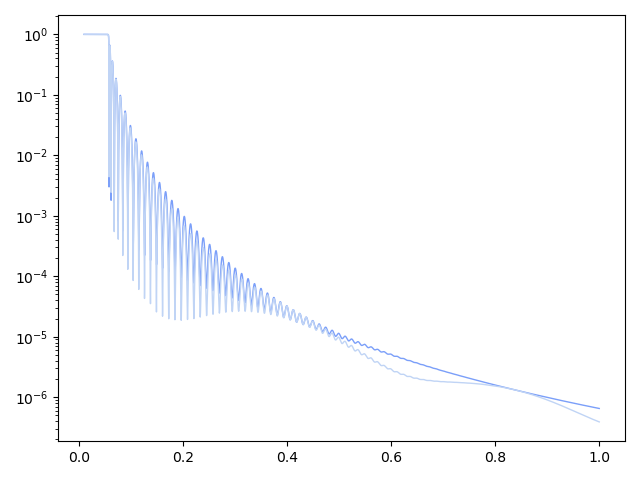

In [226]:
rg=5
fig, ax = ana_xrr.plot_model(level='nb', cfg={'nb_thk':500,'nb_rough':0,'substrate_rough':rg})
ana_xrr.plot_model(level='ox/nb', cfg={'nb_thk':500,'nb2_thk':250,'nb_rough':0,'al_rough':0, 'top_oxide_rough':0, 'substrate_rough':rg},ax=ax, fig=fig)
#ana_xrr.plot_model(level='nb/ox', cfg={'nb_thk':500,'nb_rough':0,'bottom_oxide_rough':rg/4,'bottom_oxide_thk':15,'substrate_rough':rg},ax=ax, fig=fig)

### Bottom oxide

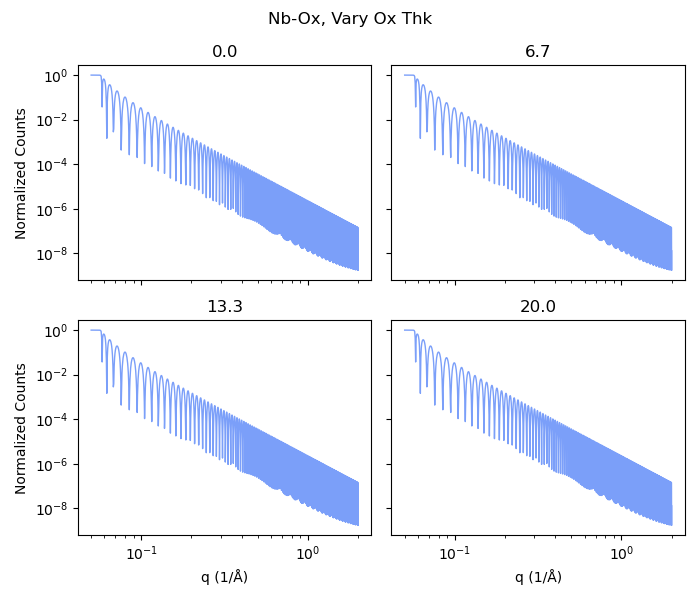

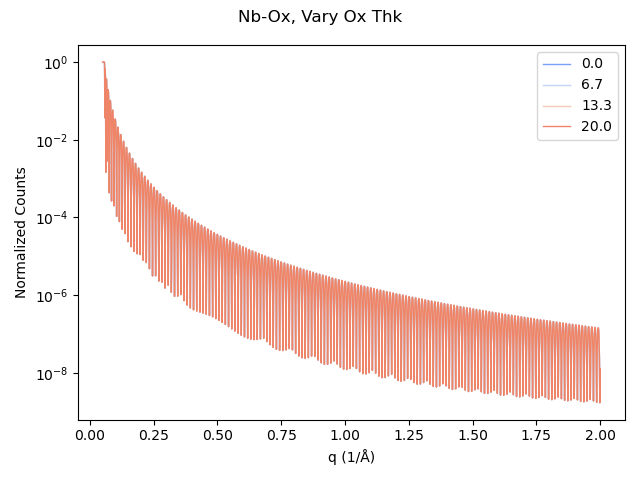

In [259]:

#ana_xrr.plot_vary('nb_thk', np.linspace(500,500,4), 'Nb, Vary Nb Thickness', level='nb')
#fig, ax = ana_xrr.plot_model(level='nb', cfg={'nb_thk':500,'nb_rough':0,'substrate_rough':rg})

ana_xrr.plot_vary('bottom_oxide_thk', np.linspace(0, 20,4), name ='Nb-Ox, Vary Ox Thk', level='nb/ox', cfg={'nb_thk':500,'nb_rough':0,'bottom_oxide_rough':0,'substrate_rough':rg},q=np.linspace(0.05, 2,5000))

In [194]:
2*np.pi/(0.66-0.597)

#2*np.pi/(0.6916-0.565) 

# 200 and 100 

2*np.pi/(0.2517-0.2391) # 498

2*np.pi/(0.2517-0.23975) # 525 

2*np.pi/(0.2517-0.2403) # 550 

2*np.pi/(0.804-0.775) # 216 junction 300 / 15 / 200
2*np.pi/(0.801-0.77) # 202, bilayer 300 / 200 

2*np.pi/(0.840- 0.417) # 15 
2*np.pi/(0.604-0.5795) # 256 


256.45654315018754

In [ ]:
#ana_xrr.plot_vary('bkg',[3e-9,1e-8,3e-8,1e-7,3e-7,1e-6] ,'Nb Single Vary Background', level=0)

#ana_xrr.plot_vary('top_oxide_thk', np.linspace(0,10,6), 'Nb and Oxide Vary Ox Thickness', level=0.5)
#ana_xrr.plot_vary('top_oxide_rough', np.linspace(50,0,6), 'Nb and Oxide Vary Ox Roughness Long', level=0.5, cfg={'top_oxide_thk':30})

#ana_xrr.plot_vary('bottom_oxide_rough', np.linspace(0,5,4), 'Nb Two Oxide Vary Bottom Ox Roughness Long', level=0.75)
#ana_xrr.plot_vary('bottom_oxide_rough', np.linspace(0,5,4), 'Nb Two Oxide Vary Bottom Ox Roughness Long', level=3)


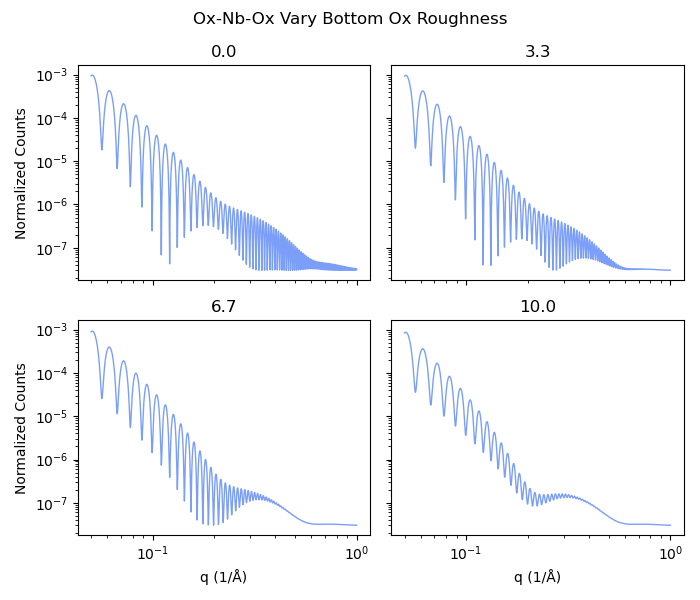

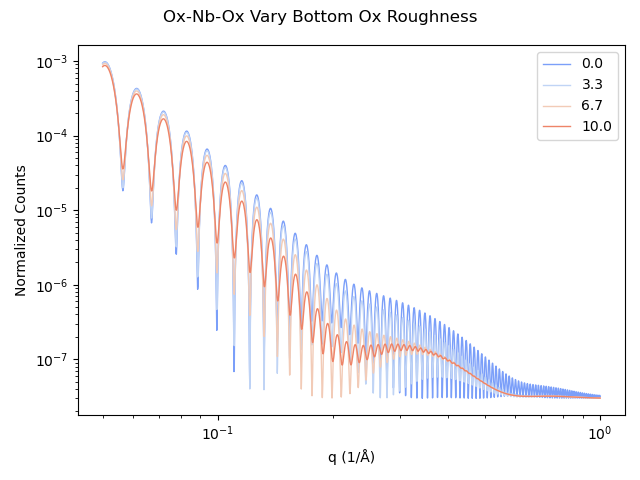

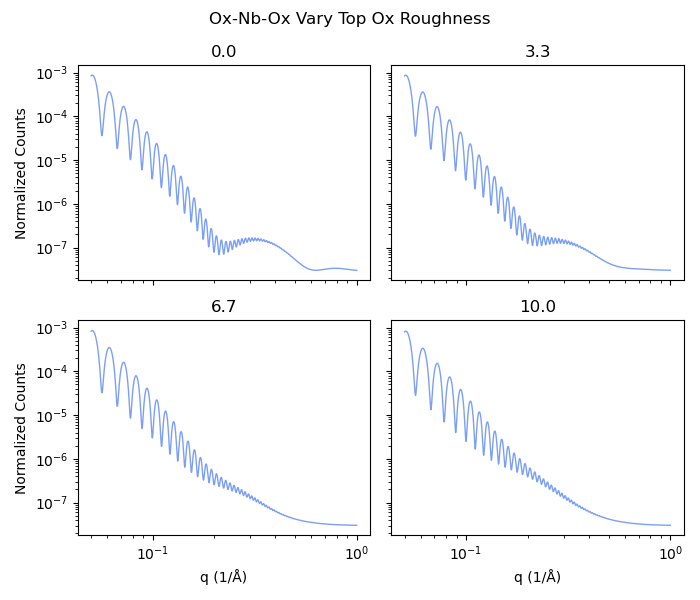

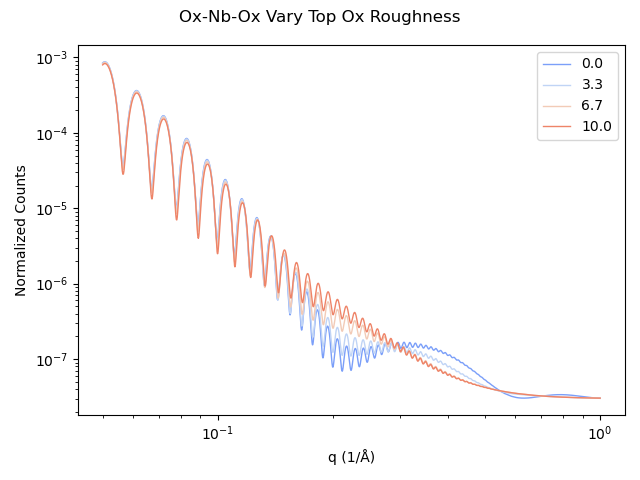

In [27]:
ana_xrr.plot_vary('bottom_oxide_rough', np.linspace(0,10,4), 'Ox-Nb-Ox Vary Bottom Ox Roughness', level='ox/nb/ox')
ana_xrr.plot_vary('top_oxide_rough', np.linspace(0,10,4), 'Ox-Nb-Ox Vary Top Ox Roughness', level='ox/nb/ox')
#ana_xrr.plot_vary('bottom_oxide_rough', np.linspace(0,5,4), 'Ox-Nb-Ox, Vary Bottom Ox Roughness Short', q=np.linspace(0.05,0.25,1000), level=3)


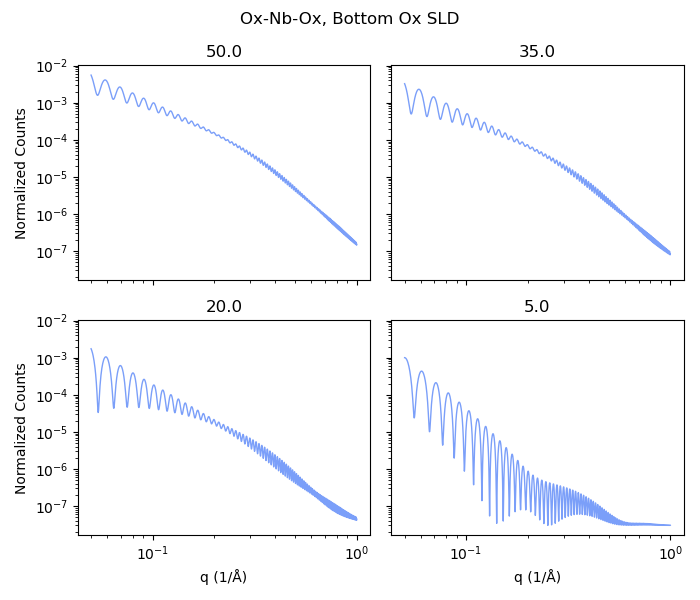

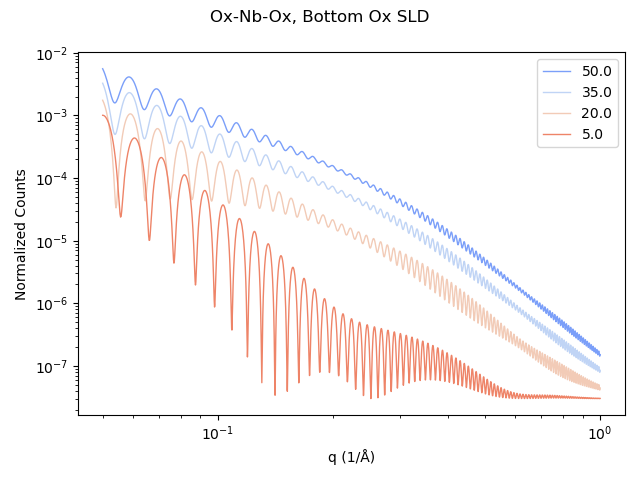

In [21]:
ana_xrr.plot_vary('bottom_oxide_sld', np.linspace(50,5,4), 'Ox-Nb-Ox, Bottom Ox SLD', level=0.75)

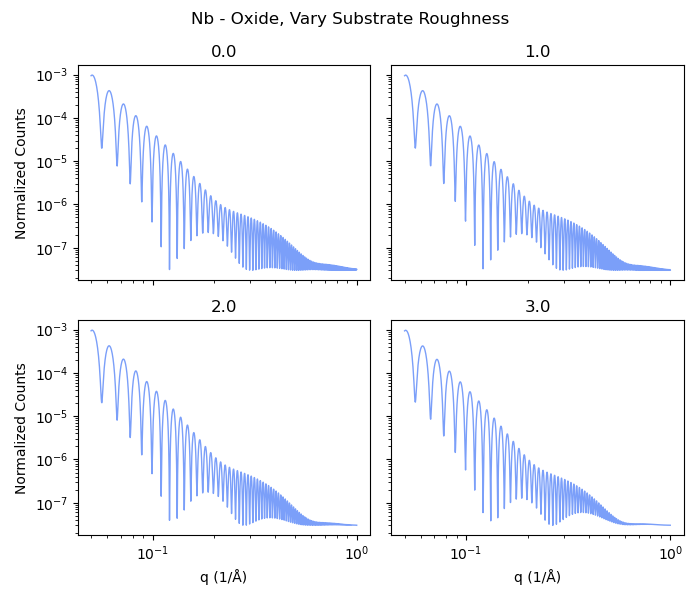

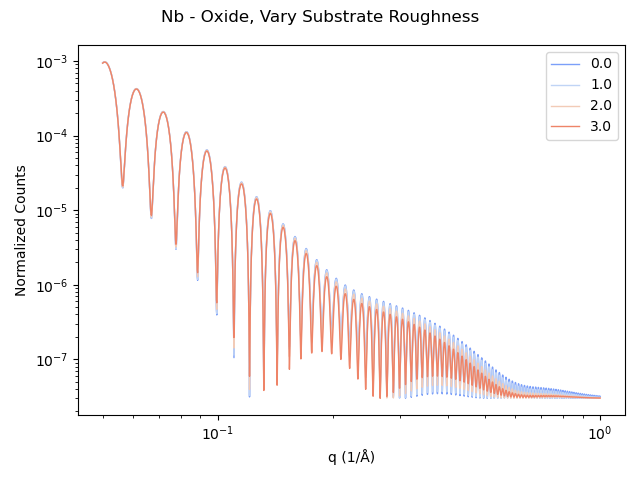

In [23]:
ana_xrr.plot_vary('substrate_rough', np.linspace(0,3,4), 'Nb - Oxide, Vary Substrate Roughness', level=0.5)

In [362]:
%history

import os.path
import numpy as np
import matplotlib.pyplot as plt
import scipy
import refnx #https://refnx.readthedocs.io/en/latest/installation.html
from refnx.dataset import ReflectDataset, Data1D
from refnx.analysis import Transform, CurveFitter, Objective, Model, Parameter
from refnx.reflect import SLD, Slab, ReflectModel
import time
import mpld3 #you may need to pip install mpld3 to get this working - it allows zoom action on inline plots
import seaborn as sns
pth = r'/Users/sph/Library/CloudStorage/GoogleDrive-circuitqed@gmail.com/My Drive/Projects/Materials/XRay/XRR/'
path = os.getcwd()
%load_ext autoreload
%autoreload 2

%matplotlib widget

fname = 'su05_XRR_1_scan1.txt'
file = os.path.join(pth,fname)

fname2 = 'su06_XRR_1_scan1.txt'
fname3 = 'su07_XRR_1_scan1.txt'
fname4 = 'su08_XRR_1_scan1.txt'
file = os.path.join(pth,fname)
file2 = os.path.join(pth,fname2)
file3 = os.path.join(pth,fname3)
file4 = os.path.join(pth,fname4)

x_start = 0
x_end = 1500
#data = loadRefData(file, x_